<h2>NAGA VENKATA SATYA AJAY KUMAR AMPAJALAPU </h2>

<h2> THE SPARKS FOUNDATION GRIPJULY21 INTERNSHIP </h2>

<h2> TASK - 2 </h2>

## Prediction using Unsupervised ML

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

### Loading dataset into a DataFrame

In [2]:
df=pd.read_csv('iris.csv')

In [3]:
df.drop('Id',axis=1,inplace=True)

In [4]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 5)

In [6]:
df.describe(include='all')    # here I used include='all' to describe categorical variables too

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


### Checking For missing data

In [7]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Predicting the optimal number of Clusters using elbow method

C:\Users\prasa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


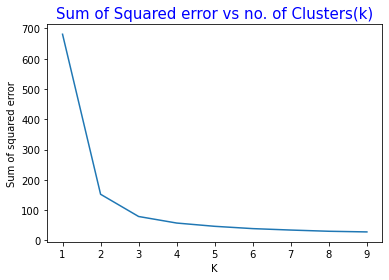

In [8]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df.drop('Species',axis=1))
    sse.append(km.inertia_)

plt.plot(k_rng,sse)
plt.title('Sum of Squared error vs no. of Clusters(k)',c='b',fontsize=15)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

From the above Elbow chart ,we can clearly say that the optimal number of clusters is 3.

### Traing a model with 3 clusters

In [9]:
model=KMeans(n_clusters=3)

In [10]:
predicted=model.fit_predict(df.drop('Species',axis=1))

In [11]:
df['Predicted']=predicted

In [12]:
df[df.Predicted==0].Species.value_counts()

Iris-versicolor    48
Iris-virginica     14
Name: Species, dtype: int64

In [13]:
df[df.Predicted==1].Species.value_counts()

Iris-setosa    50
Name: Species, dtype: int64

In [14]:
df[df.Predicted==2].Species.value_counts()

Iris-virginica     36
Iris-versicolor     2
Name: Species, dtype: int64

In [15]:
df['Actual']=df.Species.apply(lambda x: 1 if x=='Iris-setosa' else 0 if x=='Iris-versicolor' else 2)

###  Model Accuracy

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [17]:
accuracy_score(df.Actual,df.Predicted)

0.8933333333333333

In [18]:
confusion_matrix(df.Actual,df.Predicted)

array([[48,  0,  2],
       [ 0, 50,  0],
       [14,  0, 36]], dtype=int64)

In [19]:
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

### Visualization of Actual clusters (PetalWidth vs PetalLength)

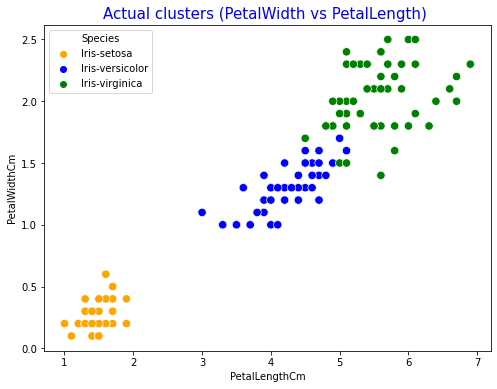

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df.PetalLengthCm,y=df.PetalWidthCm,hue=df.Species,s=70,palette=['orange','blue','Green'])
plt.title('Actual clusters (PetalWidth vs PetalLength) ',c='b',fontsize=15)
plt.show()

### Visualization of Predicted clusters (PetalWidth vs PetalLength) with cluster centers

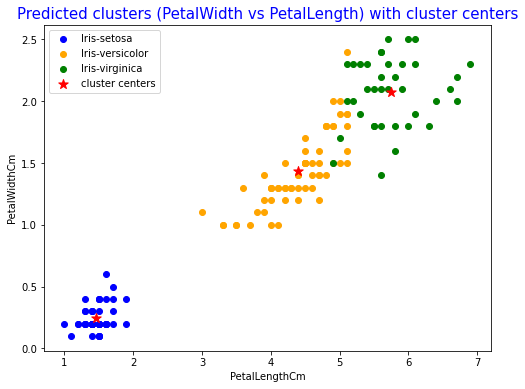

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(df[df.Predicted==1].iloc[:,2],df[df.Predicted==1].iloc[:,3],color='blue',label='Iris-setosa')
plt.scatter(df[df.Predicted==0].iloc[:,2],df[df.Predicted==0].iloc[:,3],color='orange',label='Iris-versicolor')
plt.scatter(df[df.Predicted==2].iloc[:,2],df[df.Predicted==2].iloc[:,3],color='green',label='Iris-virginica')
plt.scatter(model.cluster_centers_[:,2],model.cluster_centers_[:,3],color='red',marker='*',s=100,label='cluster centers')
plt.title('Predicted clusters (PetalWidth vs PetalLength) with cluster centers',c='blue',fontsize=15)
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()
plt.show()

### Visualization of Actual clusters (SepalWidth vs SepalLength)

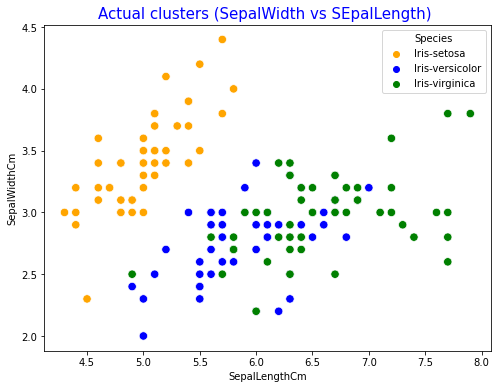

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df.SepalLengthCm,y=df.SepalWidthCm,hue=df.Species,s=70,palette=['orange','blue','Green'])
plt.title('Actual clusters (SepalWidth vs SEpalLength) ',c='b',fontsize=15)
plt.show()

### Visualization of Predicted clusters (SepalWidth vs SepalLength) with cluster centers

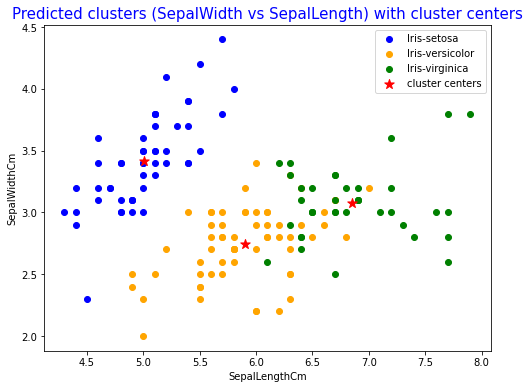

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(df[df.Predicted==1].iloc[:,0],df[df.Predicted==1].iloc[:,1],color='blue',label='Iris-setosa')
plt.scatter(df[df.Predicted==0].iloc[:,0],df[df.Predicted==0].iloc[:,1],color='orange',label='Iris-versicolor')
plt.scatter(df[df.Predicted==2].iloc[:,0],df[df.Predicted==2].iloc[:,1],color='green',label='Iris-virginica')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='red',marker='*',s=100,label='cluster centers')
plt.title('Predicted clusters (SepalWidth vs SepalLength) with cluster centers',c='blue',fontsize=15)
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()
plt.show()